In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
import torch.nn as nn
from torch.optim import Adam

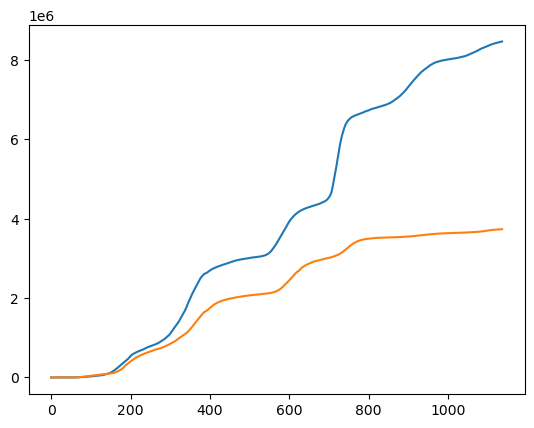

In [51]:
data = pd.read_csv('../rawdata/covid/time_series_covid19_confirmed_US.csv')
data = data[data.Province_State == 'Texas']
data = data[data.columns[11:]]

data = np.array(data.sum(axis = 0))
data = np.convolve(data, np.ones(7) / 7, 'valid')

death = pd.read_csv('../rawdata/covid/time_series_covid19_deaths_US.csv')
death = death[death.Province_State == 'Texas']
death = death[death.columns[12:]]

death = np.array(death.sum(axis = 0))
death = np.convolve(death, np.ones(7) / 7, 'valid')

plt.plot(data)
plt.plot(40 * death)

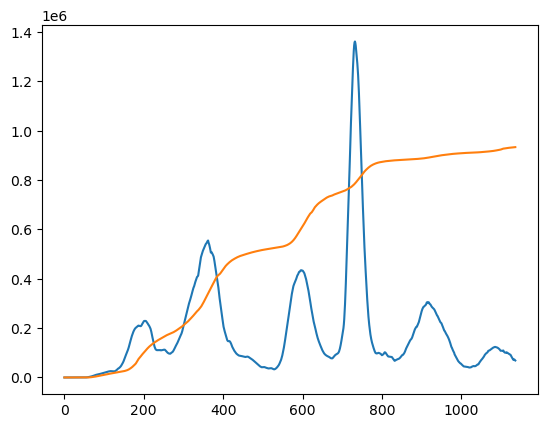

In [53]:
data_minus_10 = np.zeros(data.shape)
data_minus_10[25:] = data[:-25]

active_cases = data - data_minus_10
plt.plot(active_cases)
plt.plot(10 * death)

84.0 0.9999999999999999


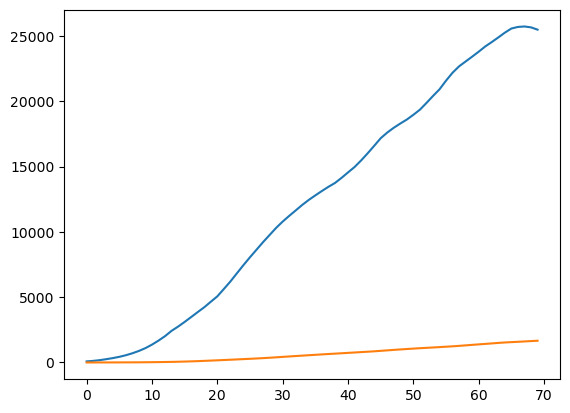

In [55]:
print(active_cases[50], death[50])
plt.plot(active_cases[50:120])
plt.plot(death[50:120])

[[1.         0.96799201]
 [0.96799201 1.        ]]
delta = 0.004597604863993947


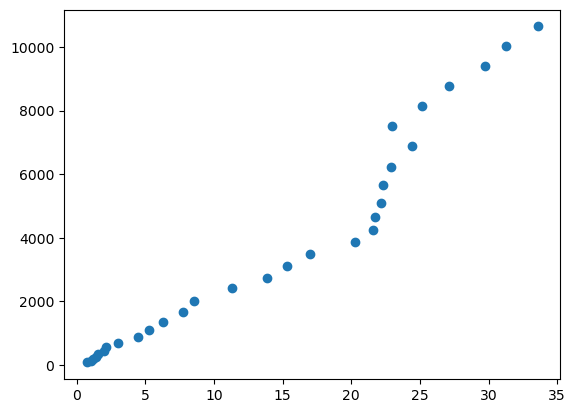

In [80]:
# what should delta be? we can easily reverse engineer this one :)
dDdt = death[1:] - death[:-1]
plt.scatter(dDdt[50:80], data[50:80])
print(np.corrcoef(dDdt[50:80], data[50:80]))
print('delta =', np.mean(dDdt[50:80] / data[50:80]))

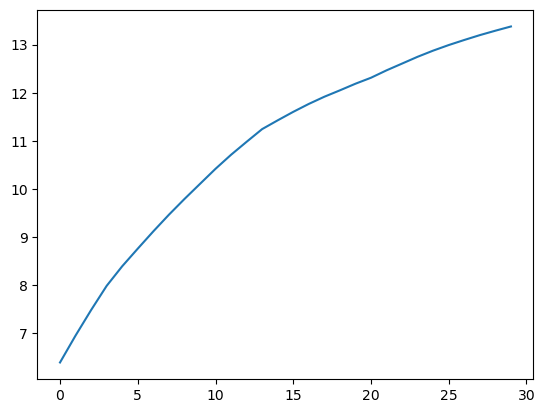

In [117]:
plt.plot(np.log2(data[50:80]))

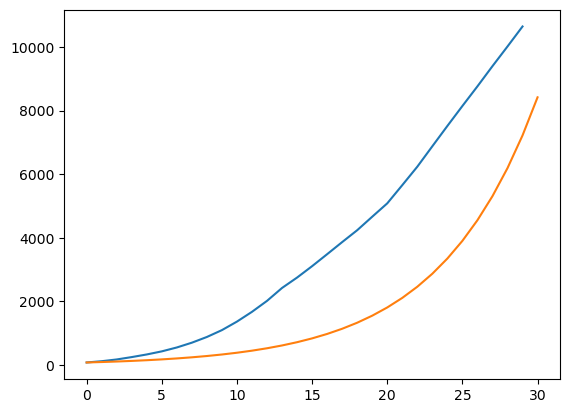

In [113]:
N = 30_000_000

S0 = N - active_cases[50]
I0 = active_cases[50]
R0 = 0
D0 = death[50]

St = [S0]
It = [I0]
Rt = [R0]
Dt = [D0]

dt = 1.
Tt = 0.
T = 30.

beta = .22
alpha = 0.05
delta = 0.004
gamma = 0.

while Tt < T:
    Tt += dt

    dS = (gamma * Rt[-1]) - (beta * St[-1] * It[-1] / N)
    dI = (beta * St[-1] * It[-1] / N) - (alpha + delta) * It[-1]
    dR = (alpha * It[-1]) - (gamma * Rt[-1])
    dD = delta * It[-1]

    S = St[-1] + (dt * dS)
    I = It[-1] + (dt * dI)
    R = Rt[-1] + (dt * dR)
    D = Dt[-1] + (dt * dD)

    St.append(S)
    It.append(I)
    Rt.append(R)
    Dt.append(D)

plt.plot(data[50:80])
plt.plot(It)